# Continuous
<img src="4_images/integral_property.png" width="1000">
(the same for sin)

Then we could define:

<img src="4_images/fourier_transform_components.png" width="1000">

Each of them will be inf if u corresponds to the frequency of f(x) and 0 otherwise.

Then we define Fourier transform:

<img src="4_images/fourier_transform.png" width="1000">

Where:

<img src="4_images/fourier_transform_result_properties.png" width="1000">

F(u) indicates amplitude of frequencies which compose f(x).
'A' will be inf then w corresponds to the true frequency of f(x)

## Inverse
We could get the original function from fourier transform:
<img src="4_images/fourier_transform_inverse.png" width="1000">

# Discreet
<img src="4_images/fourier_transform_discreet.png" width="1000">

Where k is a frequency. $k \in [-N/2, N/2]$

# 2-d case
<img src="4_images/fourier_transform_2d.png" width="1000">


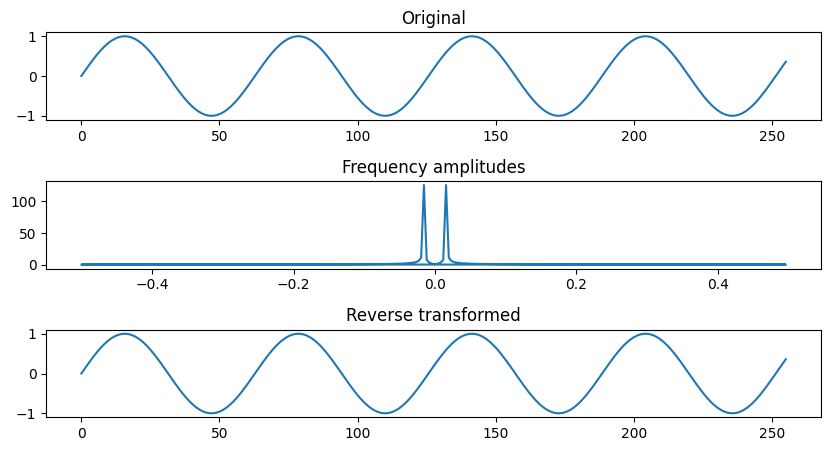

In [1]:
from scipy.fft import fft, fftfreq, ifft
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'hspace': 0.7})
fig.set_figheight(5)
fig.set_figwidth(10)

t = np.arange(256)
data = np.sin(1 / 10 * t)
ax1.plot(t, data)
ax1.title.set_text('Original')

F = fft(data)
A = (F.real ** 2 + F.imag ** 2) ** (1/2)
frequency_list = fftfreq(t.shape[-1])
ax2.plot(frequency_list, A)
ax2.title.set_text('Frequency amplitudes')

data_reverse = ifft(F)
ax3.plot(t, data_reverse.real)
ax3.title.set_text('Reverse transformed')
plt.show()

In [2]:
from scipy.fft import fft2, fftfreq, ifft2, fftshift
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2 as cv
from opencv_.utils import show

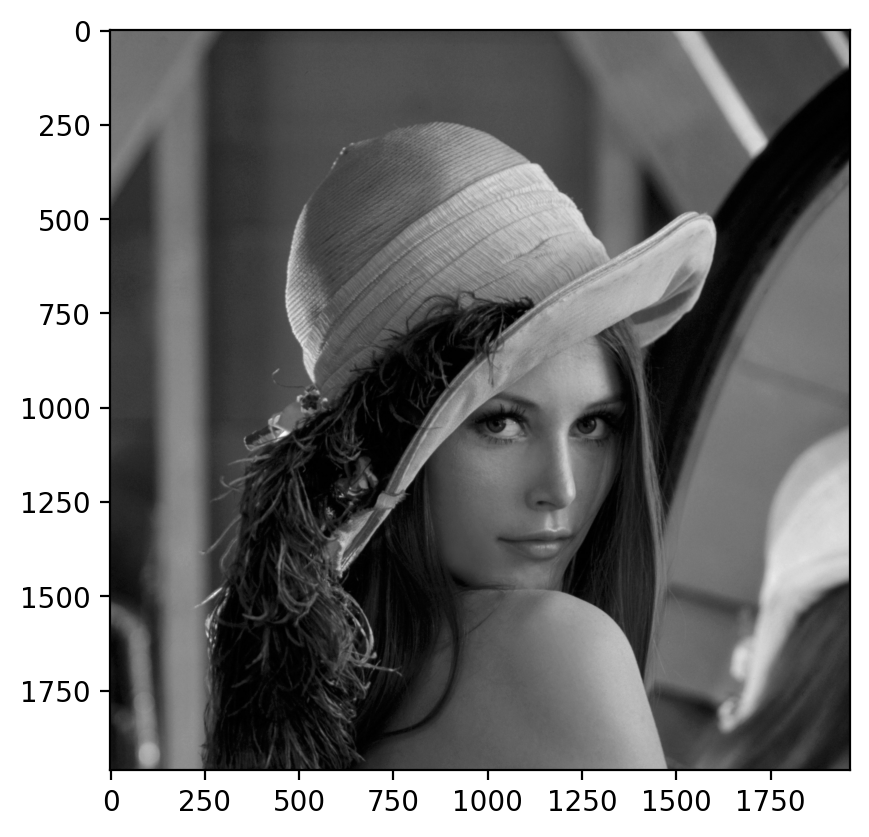

In [3]:
img_original = cv.imread('./4_images/lenna.jpeg', cv.IMREAD_GRAYSCALE)
show(img_original, dpi=200)

In [4]:
def plot_amplitudes(amplitudes, title, q=0.75):
    upper_value = np.quantile(A, q=q)
    amplitudes_normed = ((amplitudes - amplitudes.min()) / (upper_value - amplitudes.min()) * 255).clip(0, 255).astype(np.uint8)
    frequency_x_list = fftfreq(amplitudes.shape[1])
    frequency_y_list = fftfreq(amplitudes.shape[0])
    amplitudes_normed = fftshift(amplitudes_normed)
    frequency_x_list = fftshift(frequency_x_list)
    frequency_y_list = fftshift(frequency_y_list)
    X, Y = np.meshgrid(frequency_x_list, frequency_y_list)

    im = plt.pcolormesh(X, Y, amplitudes_normed, cmap=cm.gray)
    plt.title(title)
    plt.colorbar(im)
    plt.show()

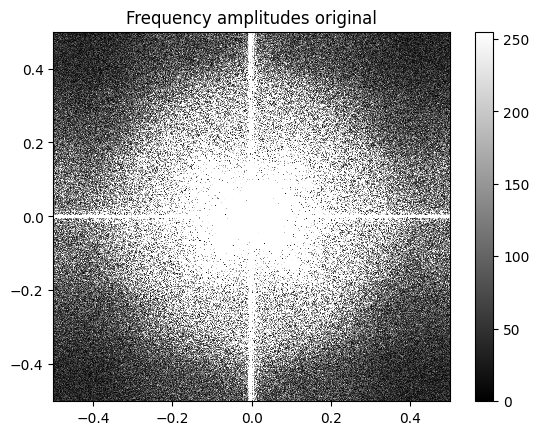

In [5]:
F = fft2(img_original, axes=(0, 1))
A = (F.real ** 2 + F.imag ** 2) ** (1/2)
plot_amplitudes(A, 'Frequency amplitudes original')

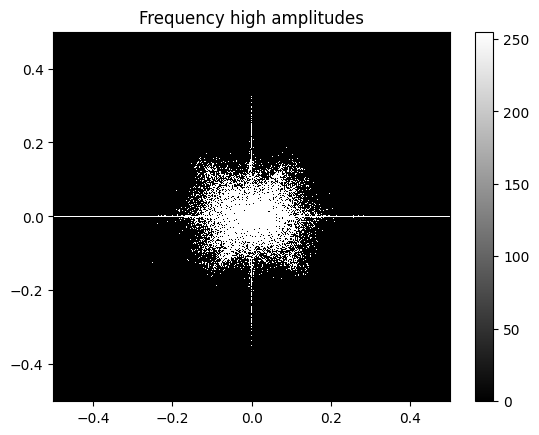

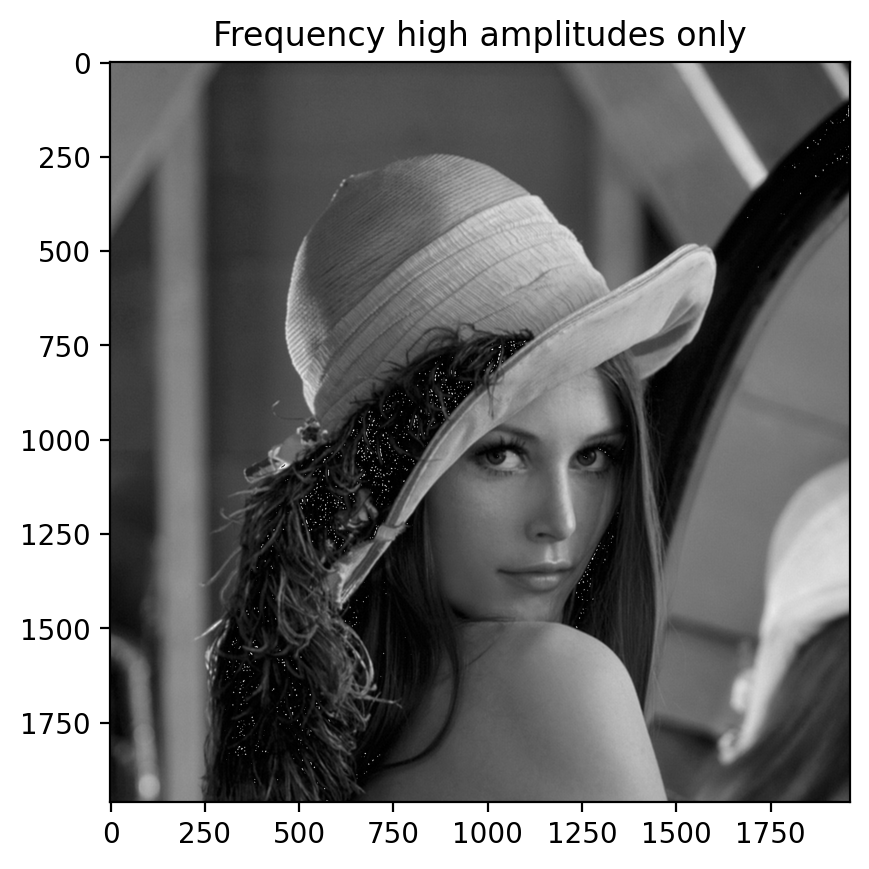

In [9]:
F_top = F.copy()
top_value = np.quantile(A, q=0.95)
F_top[A < top_value] = 0 + 0j
A_top = (F_top.real ** 2 + F_top.imag ** 2) ** (1/2)
plot_amplitudes(A_top, 'Frequency high amplitudes')

img_reverse_top = ifft2(F_top, axes=(0, 1))
img_reverse_top = img_reverse_top.real.astype(np.uint8)
show(img_reverse_top, dpi=200, title='Frequency high amplitudes only')

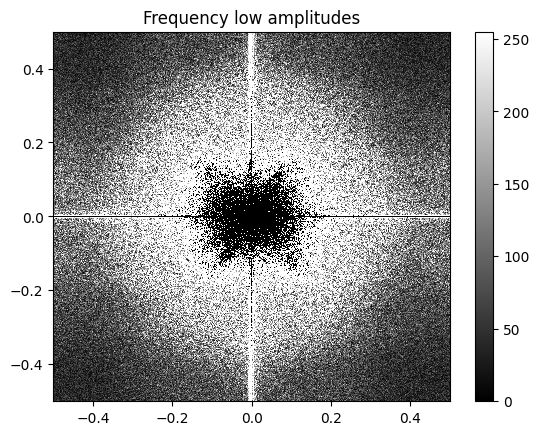

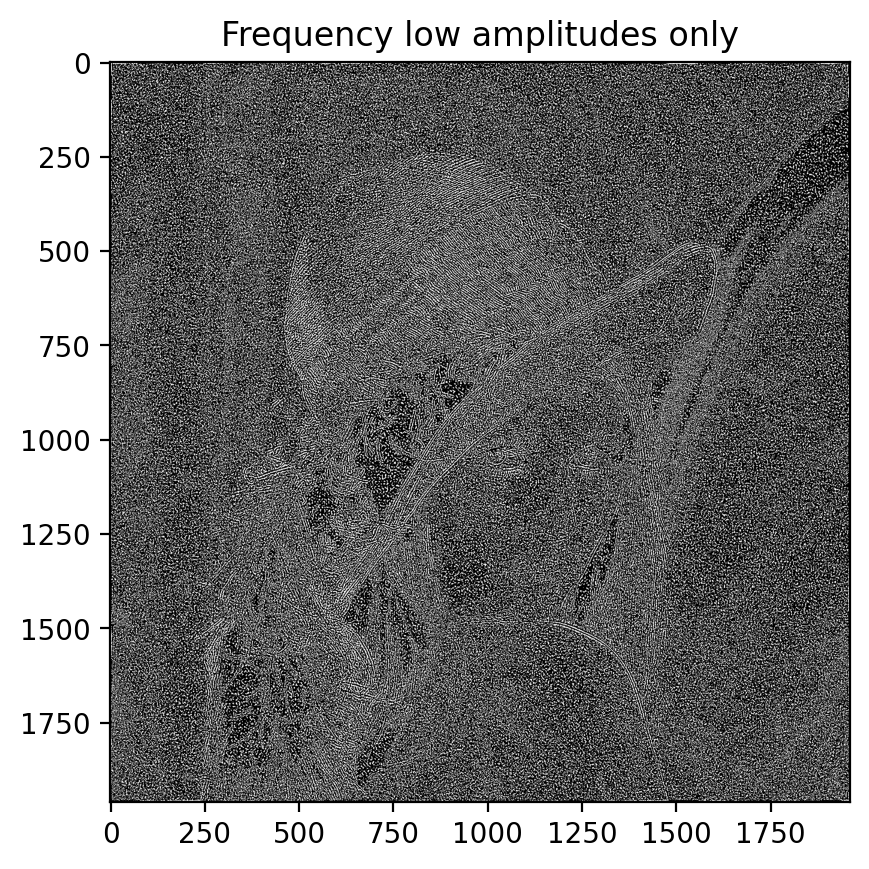

In [10]:
F_low = F.copy()
top_value = np.quantile(A, q=0.95)
F_low[A > top_value] = 0 + 0j
A_low = (F_low.real ** 2 + F_low.imag ** 2) ** (1/2)
plot_amplitudes(A_low, 'Frequency low amplitudes')

img_reverse_low = ifft2(F_low, axes=(0, 1))
img_reverse_low = img_reverse_low.real.astype(np.uint8)
show(img_reverse_low, dpi=200, title='Frequency low amplitudes only')

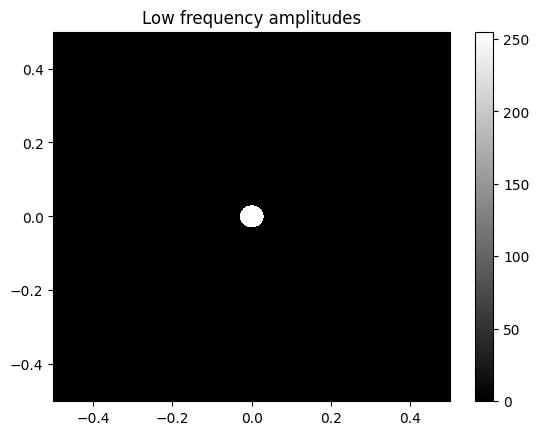

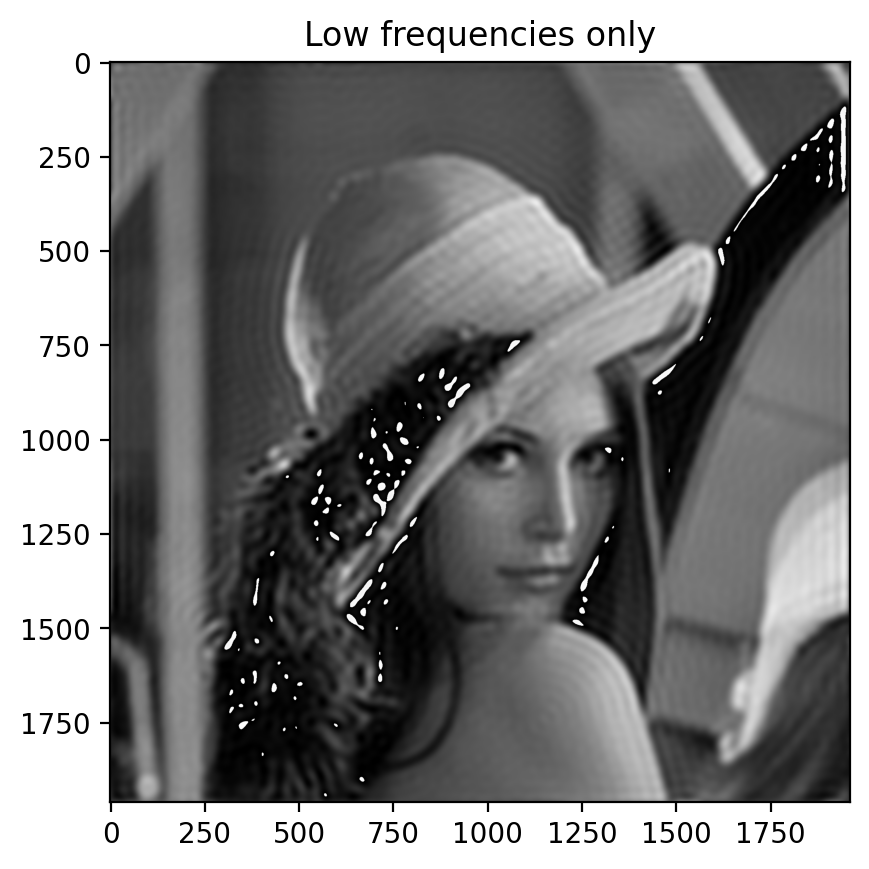

In [11]:
F_frequency_low = F.copy()
frequency_x_list = fftfreq(F_frequency_low.shape[1])
frequency_y_list = fftfreq(F_frequency_low.shape[0])
frequency_x_list, frequency_y_list = np.meshgrid(frequency_x_list, frequency_y_list)
frequency_high_mask = (frequency_x_list ** 2 + frequency_y_list ** 2) ** (1 / 2) > 0.03
F_frequency_low[frequency_high_mask] = 0 + 0j
A_frequency_low = (F_frequency_low.real ** 2 + F_frequency_low.imag ** 2) ** (1/2)
plot_amplitudes(A_frequency_low, 'Low frequency amplitudes')

img_reverse_frequency_low = ifft2(F_frequency_low, axes=(0, 1))
img_reverse_frequency_low = img_reverse_frequency_low.real.astype(np.uint8)
show(img_reverse_frequency_low, dpi=200, title='Low frequencies only')

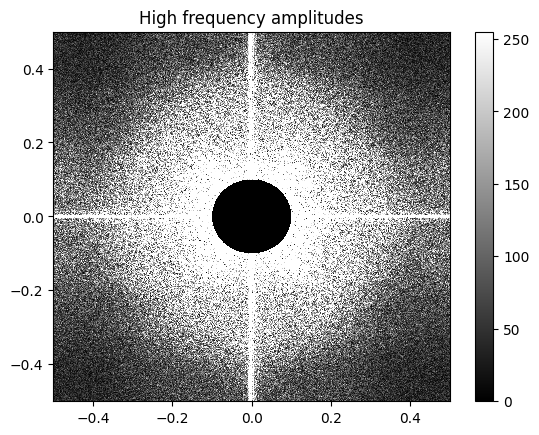

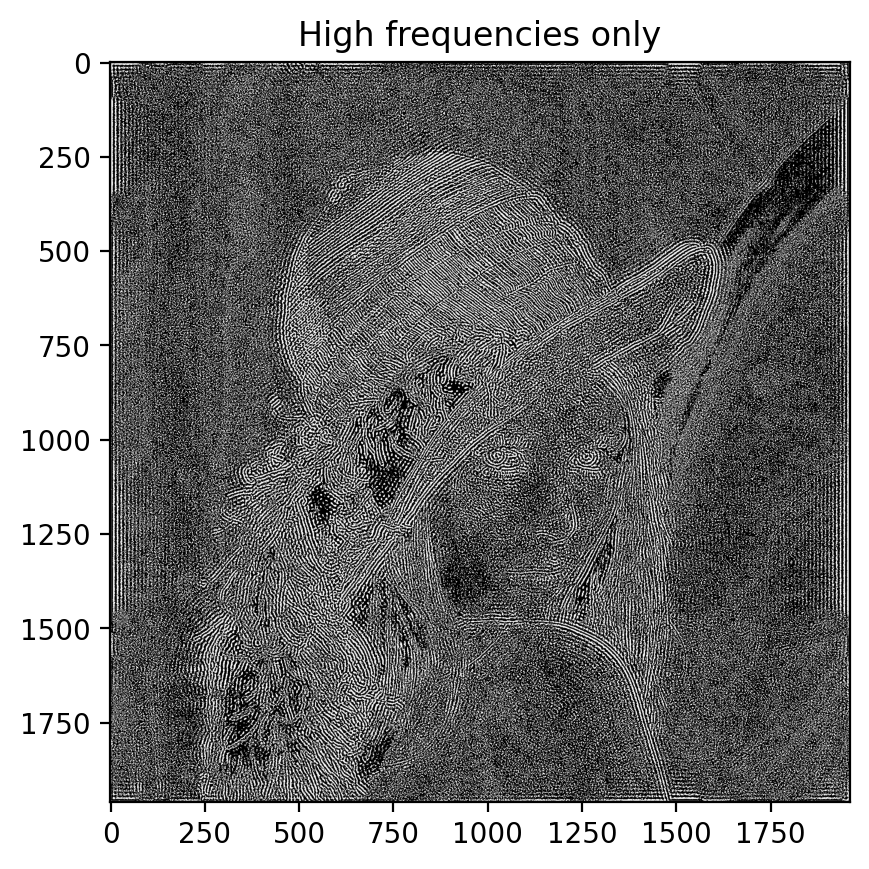

In [12]:
F_frequency_high = F.copy()
frequency_x_list = fftfreq(F_frequency_high.shape[1])
frequency_y_list = fftfreq(F_frequency_high.shape[0])
frequency_x_list, frequency_y_list = np.meshgrid(frequency_x_list, frequency_y_list)
frequency_high_mask = (frequency_x_list ** 2 + frequency_y_list ** 2) ** (1 / 2) > 0.1
F_frequency_high[~frequency_high_mask] = 0 + 0j
A_frequency_high = (F_frequency_high.real ** 2 + F_frequency_high.imag ** 2) ** (1/2)
plot_amplitudes(A_frequency_high, 'High frequency amplitudes')

img_reverse_frequency_high = ifft2(F_frequency_high, axes=(0, 1))
img_reverse_frequency_high = img_reverse_frequency_high.real.astype(np.uint8)
show(img_reverse_frequency_high, dpi=200, title='High frequencies only')

# Convolution in frequency domain

<img src="4_images/fourier_transform_and_convolution.png" width="1000">

where
    * - convolution
    $\cdot$ - multiplication

Note: for large images and convolutions it is faster to switch to frequency domain, multiply matrices and switch back to the spacial domain

Properties of Fourier Transform:
<img src="4_images/fourier_transform_properties.png" width="1000">

# Average smoothing vs removing high frequency components
<img src="4_images/fourier_transform_smoothing.png" width="1000">

Note: removing high frequencies is equal to convolution with sinc(x) which is pretty ugly filter

# Aliasing

To represent continuous signal in discrete computers' world we use sampling:
<img src="4_images/sampling.png" width="500">
Sometimes, we need to reconstruct original continuous signal by it's discrete representation (to play sound, for example)
If sampling rate is too low, we can't restore the information about high frequencies:
<img src="4_images/undersampling.png" width="1000">
This is called 'aliasing' - signals "traveling in disguise" as other frequencies. The next image has too low resolution to represent highest frequencies, what is why aliasing shows up:
<img src="4_images/undersampling_example.png" width="1000">

## Antialiasing
1. Increase sample frequency - inefficient, this can't go on forever
2. Get rid of some high frequencies - some information will be lost, but it is better then aliasing

We will follow the second solution.
Let's define a 'comb' function (impulse train) in 1D as follows:
<img src="4_images/comb_function_1d.png" width="500">
where $\delta$ is 1 if arg is 0 and 0 otherwise
Fourier transform for this function will be:
<img src="4_images/comb_function_1d_fourier_transform.png" width="1000">
In 2D case:
<img src="4_images/comb_function_2d_fourier_transform.png" width="1000">

We sample low-frequency signal as follows:
<img src="4_images/sampling_low_frequencies.png" width="1000">
We could restore the original signal from the lowest frequencies of sample's fourier transform if the maximum frequency of original signal W < 1/2M
<img src="4_images/sampling_no_intersection.png" width="500">
Otherwise, we need to convolve the original signal with anti-aliasing filter (gaussian) first:
<img src="4_images/sampling_high_frequencies.png" width="1000">

Let's compare results of image resized by sampling (take each 8th column/row) convolved by gaussian before and just sampling of the original:
<img src="4_images/image_resize.png" width="1000">
With second approach we see aliasing because we sample too infrequently and get random parts of high frequency elements which do not represent them in general.

# Campbell-Robson contrast sensitivity curve
Contract increases from top to bottom
Frequency increases from left to right
<img src="4_images/campbell_robson_curve.png" width="1000">
Humans' vision system is insensitive to high frequency and low contrast visual signals. This property is used for image compression (.jpeg images)